In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<div style="background-color:rgba(0.1, 0, 0, 0.3); text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
  
<h1>    
<span style="color:gold">  Binance API with Python</span>
</h1>
</div>

### In this short tutorial we will use a Python wrapper to connect with the Binance exchange API. This third-party library is called [python-binance](https://python-binance.readthedocs.io/en/latest/index.html).



> ### To follow this tutorial you will need to:
>  - Have an account on Binance, [here](https://python-binance.readthedocs.io/en/latest/index.html) you can create one
>  - Create an API key within your Binance account. You must follow [these steps](https://www.binance.com/en/support/faq/360002502072).
>  - Install python-binance, which is as simple as making `!pip install python-binancecode`


> ### The content covered in this material includes:
>  - Connecting to Binance API and streaming live cryptocurrency trading data.
>  - Saving cryptocurrency data to a csv/json file and visualizing the data using <span style="color:navy">mplfinance</span>.

### 1) Connect to Binance API and check your balance

In [2]:
#--- If you don't have python-binance installed, uncomment the line below.
#!pip install python-binance

#--- The first step is to import the Client class and introducing your API key:
from binance.client import Client

#---  Write your API and secret key below:
API_key='write_your_API_key'
Secret_key='write_your_secret_key'

In [3]:
#--- Connect to the API with your personal account
client = Client(API_key,Secret_key) 

> to check that you connected successfully you can ask for your account type and balance with the following code

In [4]:
account = client.get_account()
account

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'updateTime': 1630755483721,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00169517', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '0.00000000', 'locked'

> As you can see, the variable `account` is a dictionary which includes the current balance for the different assets. In my case, I have a few BTC. Below we print its amount:

In [5]:
print(type(account))
print(type(account['balances']))
account['balances'][0]

<class 'dict'>
<class 'list'>


{'asset': 'BTC', 'free': '0.00169517', 'locked': '0.00000000'}

> You can ask for the balance in your account for a specific asset. Let's do this for BTC

In [6]:
BTC_balance = client.get_asset_balance(asset='BTC')
BTC_balance

{'asset': 'BTC', 'free': '0.00169517', 'locked': '0.00000000'}

> On the other hand, you can get a list with the current prices for all the assets available at Binance by making:

In [7]:
prices = client.get_all_tickers()
prices

[{'symbol': 'ETHBTC', 'price': '0.07694100'},
 {'symbol': 'LTCBTC', 'price': '0.00435900'},
 {'symbol': 'BNBBTC', 'price': '0.00976800'},
 {'symbol': 'NEOBTC', 'price': '0.00122000'},
 {'symbol': 'QTUMETH', 'price': '0.00398600'},
 {'symbol': 'EOSETH', 'price': '0.00156800'},
 {'symbol': 'SNTETH', 'price': '0.00002958'},
 {'symbol': 'BNTETH', 'price': '0.00119600'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00022660'},
 {'symbol': 'BNBETH', 'price': '0.12690000'},
 {'symbol': 'BTCUSDT', 'price': '51615.16000000'},
 {'symbol': 'ETHUSDT', 'price': '3971.06000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00002115'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

> A specific pair price can be obtained using the `symbol` command

In [8]:
ETHBTC_price = client.get_all_tickers(symbol='ETHBTC')
ETHBTC_price

{'symbol': 'ETHBTC', 'price': '0.07693400'}

> Saving this data to a dataframe is plain and simple:

In [9]:
#--- Import the pandas library
import pandas as pd 

#--- Create and display the data frame
price_df = pd.DataFrame(prices)
price_df

,symbol,price
0,ETHBTC,0.07694100
1,LTCBTC,0.00435900
2,BNBBTC,0.00976800
3,NEOBTC,0.00122000
4,QTUMETH,0.00398600
...,...,...
1616,XECUSDT,0.00030700
1617,C98BRL,23.56000000
1618,SOLAUD,185.07000000
1619,SUSHIBIDR,201589.00


> There are many more of things that you can do with the `client` object. If you want to automate trading operations, the `help` command will give you all the relevant information


In [10]:
help(client)

Help on Client in module binance.client object:

class Client(BaseClient)
 |  Client(api_key: Union[str, NoneType] = None, api_secret: Union[str, NoneType] = None, requests_params: Dict[str, str] = None, tld: str = 'com', testnet: bool = False)
 |  
 |  Method resolution order:
 |      Client
 |      BaseClient
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api_key: Union[str, NoneType] = None, api_secret: Union[str, NoneType] = None, requests_params: Dict[str, str] = None, tld: str = 'com', testnet: bool = False)
 |      Binance API Client constructor
 |      
 |      :param api_key: Api Key
 |      :type api_key: str.
 |      :param api_secret: Api Secret
 |      :type api_secret: str.
 |      :param requests_params: optional - Dictionary of requests params to use for all calls
 |      :type requests_params: dict.
 |      :param testnet: Use testnet environment - only available for vanilla options at the moment
 |      :type testnet: bool
 |  
 |  aggr

### 2) Stream cryptocurrency trading data and create a dataframe 

We have two different ways to interact with websockets, either using `ThreadedWebsocketManager` or `BinanceSocketManager`. 

The difference is that `ThreadedWebsocketManager` does not require async programming, so for simplicity we will use it.


In [11]:
#--- Import ThreadedWebsocketManager
from binance import ThreadedWebsocketManager

#--- Import the functions from Callback.py in order to process websocket messages
from Callback import *

In [12]:
#--- Initialize the websocket object
twm = ThreadedWebsocketManager()
twm.start()

In [13]:
#--- As an example we will stream the price for the BTCUSDT pair
stream=twm.start_symbol_ticker_socket(callback=symbol_ticker_callback, symbol='BTCUSDT')
stream 

'btcusdt@ticker'

current close price: 51677.35000000
current close price: 51687.74000000
current close price: 51688.38000000
current close price: 51694.01000000


In [14]:
# stop websocket
twm.stop()

current close price: 51695.28000000


> Notice that you can change the callback from `symbol_ticker_callback` to `streaming_symbol_ticker`, to get a message with additional information including the best ask/bid price.
>
> Next we will stream full data from candlestick using the `start_kline_socket`

In [15]:
#--- Once again we need to initialize the twm object
twm = ThreadedWebsocketManager()
twm.start()

In [16]:
stream=twm.start_kline_socket(callback=kline_callback,symbol='BTCUSDT')
stream

'btcusdt@kline_1m'

kline data:
{'e': 'kline', 'E': 1630875947559, 's': 'BTCUSDT', 'k': {'t': 1630875900000, 'T': 1630875959999, 's': 'BTCUSDT', 'i': '1m', 'f': 1039278297, 'L': 1039281191, 'o': '51617.93000000', 'c': '51700.76000000', 'h': '51706.47000000', 'l': '51606.24000000', 'v': '71.35189000', 'n': 2895, 'x': False, 'q': '3686996.18410230', 'V': '38.94085000', 'Q': '2012017.87571220', 'B': '0'}}
---------------------------
kline data:
{'e': 'kline', 'E': 1630875949561, 's': 'BTCUSDT', 'k': {'t': 1630875900000, 'T': 1630875959999, 's': 'BTCUSDT', 'i': '1m', 'f': 1039278297, 'L': 1039281236, 'o': '51617.93000000', 'c': '51709.99000000', 'h': '51710.00000000', 'l': '51606.24000000', 'v': '73.00325000', 'n': 2940, 'x': False, 'q': '3772385.69402890', 'V': '40.30988000', 'Q': '2082808.44068540', 'B': '0'}}
---------------------------


In [17]:
# stop websocket
twm.stop()

kline data:
{'e': 'kline', 'E': 1630875951767, 's': 'BTCUSDT', 'k': {'t': 1630875900000, 'T': 1630875959999, 's': 'BTCUSDT', 'i': '1m', 'f': 1039278297, 'L': 1039281324, 'o': '51617.93000000', 'c': '51703.12000000', 'h': '51710.00000000', 'l': '51606.24000000', 'v': '80.75270000', 'n': 3028, 'x': False, 'q': '4173049.22329710', 'V': '44.15639000', 'Q': '2281703.58644790', 'B': '0'}}
---------------------------


> It's interesting to stream live data, but what would be even more useful is to have the candlestick data into a data frame, so let's do this!
>
> As an example, we will pull data using the API for the BTC/USDT pair and we will create a dataframe from there. We will ask for trading data for the entire month of august, with time intervals of 1 day

In [18]:
#--- Pull data
klines=client.get_historical_klines(symbol= 'BTCUSDT', interval = '1d',start_str = '2021-08-01',end_str = '2021-08-31')

#--- Create dataframe
df= pd.DataFrame(klines, columns=['Open Time', 'Open', 'High', 'Low', 'Close','Volume','Close Time','QAV','NOT','TBBAV','TBQAV','unk'])
df


,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NOT,TBBAV,TBQAV,unk
0,1627776000000,41461.84000000,42599.00000000,39422.01000000,39845.44000000,53953.18632600,1627862399999,2227567271.48786541,1603964,25796.75379500,1066579608.83982349,0
1,1627862400000,39850.27000000,40480.01000000,38690.00000000,39147.82000000,50837.35195400,1627948799999,2010928003.59440882,1162878,24558.00534300,971596720.94675931,0
2,1627948800000,39146.86000000,39780.00000000,37642.03000000,38207.05000000,57117.43585300,1628035199999,2195360658.56732878,1379871,27683.46659800,1064118781.84985729,0
3,1628035200000,38207.04000000,39969.66000000,37508.56000000,39723.18000000,52329.35243000,1628121599999,2028792778.18480471,1220555,26804.21116900,1039347051.55552658,0
4,1628121600000,39723.17000000,41350.00000000,37332.70000000,40862.46000000,84343.75562100,1628207999999,3314527738.33973321,1913281,41673.12908100,1638359889.80201597,0
5,1628208000000,40862.46000000,43392.43000000,39853.86000000,42836.87000000,75753.94134700,1628294399999,3148022459.91615849,2223356,38278.00475800,1591634314.10080118,0
6,1628294400000,42836.87000000,44700.00000000,42446.41000000,44572.54000000,73396.74080800,1628380799999,3197407326.03679334,2258213,37355.62384500,1627865923.87897347,0
7,1628380800000,44572.54000000,45310.00000000,43261.00000000,43794.37000000,69329.09269800,1628467199999,3074924734.87934016,1857112,34099.15066000,1512451140.39891587,0
8,1628467200000,43794.36000000,46454.15000000,42779.00000000,46253.40000000,74587.88484500,1628553599999,3362870286.25811797,2130595,38464.60543000,1735618666.81813226,0
9,1628553600000,46248.87000000,46700.00000000,44589.46000000,45584.99000000,53814.64342100,1628639999999,2452485823.93365419,1951330,26592.36931400,1212338434.73183560,0


> The acronyms in the columns of the dataframe are
>
> * **QAV:** Quote Asset Volume
> * **NOT:** Number Of Trades
> * **TBBAV:** Taker Buy Base Asset Volume
> * **TBQAV:** Taker Buy Quote Asset Volume 
>
> Before saving into a .csv, let's make the proper conversion of time for the timestamp column

In [19]:
df['Open Time'] = pd.to_datetime(df['Open Time']/1000, unit='s')
df['Close Time'] = pd.to_datetime(df['Close Time']/1000, unit='s')
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NOT,TBBAV,TBQAV,unk
0,2021-08-01,41461.84000000,42599.00000000,39422.01000000,39845.44000000,53953.18632600,2021-08-01 23:59:59.999000064,2227567271.48786541,1603964,25796.75379500,1066579608.83982349,0
1,2021-08-02,39850.27000000,40480.01000000,38690.00000000,39147.82000000,50837.35195400,2021-08-02 23:59:59.999000064,2010928003.59440882,1162878,24558.00534300,971596720.94675931,0
2,2021-08-03,39146.86000000,39780.00000000,37642.03000000,38207.05000000,57117.43585300,2021-08-03 23:59:59.999000064,2195360658.56732878,1379871,27683.46659800,1064118781.84985729,0
3,2021-08-04,38207.04000000,39969.66000000,37508.56000000,39723.18000000,52329.35243000,2021-08-04 23:59:59.999000064,2028792778.18480471,1220555,26804.21116900,1039347051.55552658,0
4,2021-08-05,39723.17000000,41350.00000000,37332.70000000,40862.46000000,84343.75562100,2021-08-05 23:59:59.999000064,3314527738.33973321,1913281,41673.12908100,1638359889.80201597,0


In [20]:
#--- Now you can save this dataframe to a .csv
df.to_csv (r'BTC_USD_august.csv', index = None, header=True)

#--- Or if you prefer a JSON file, you can also save this data easily with the code below
import json
with open('BTC_USD_august.json', 'w') as e:
    json.dump(klines, e)

### 3) Data visualization

We will use the [mplfinance](https://github.com/matplotlib/mplfinance) library to create visualizations from the previous dataframe

In [21]:
#--- Let's install the mplfinance package
!pip install python-binance pandas mplfinance

In [22]:
#--- Import the module
import mplfinance as mpf

> Creating a chart is as simple as doing `mpf.plot(data)`, but first we need to convert the relevant columns into numeric columns, since right now they are plain objects

In [23]:
#--- print current column types
print('column types:', df.dtypes)

#--- convert to numerics:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'QAV', 'TBBAV', 'TBQAV']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, axis=1)

#--- print new column types
print('new column types:',df.dtypes)

column types: Open Time     datetime64[ns]
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time    datetime64[ns]
QAV                   object
NOT                    int64
TBBAV                 object
TBQAV                 object
unk                   object
dtype: object
new column types: Open Time     datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Close Time    datetime64[ns]
QAV                  float64
NOT                    int64
TBBAV                float64
TBQAV                float64
unk                   object
dtype: object


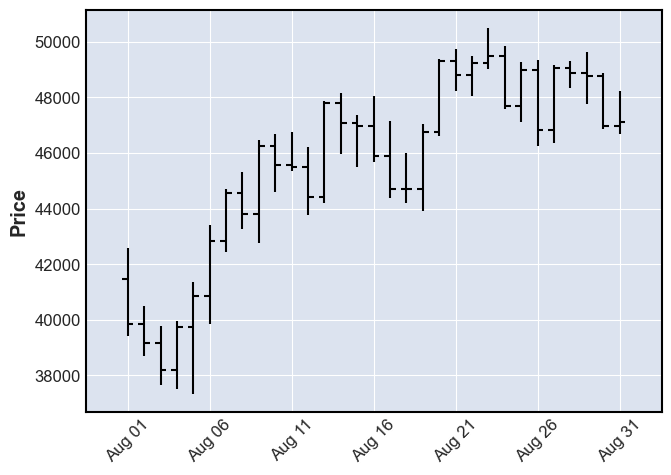

In [24]:
#--- create a plot with price variation over time
mpf.plot(df.set_index('Close Time'))


> The above bar-type plot can be customized and transformed into a candlestick plot, similar to what you will find when using the Binance site

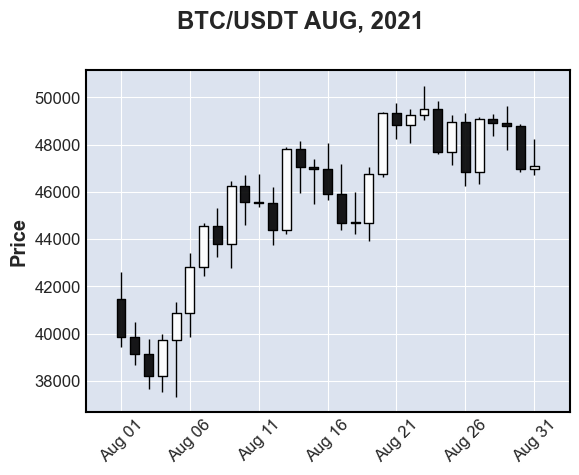

In [25]:
#--- Set the kwargs that we will use for the plot
kwargs = dict(type='candle',title="BTC/USDT AUG, 2021",figratio=(11,8),figscale=0.85)

mpf.plot(df.set_index('Close Time'),**kwargs)

> We can also change the style of the plot

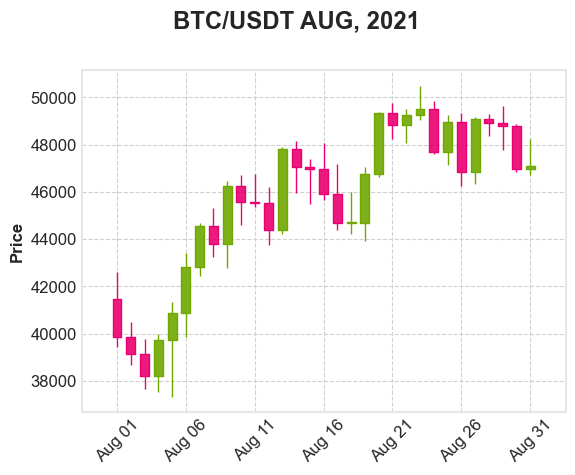

In [26]:
mpf.plot(df.set_index('Close Time'),**kwargs,style='binance')

> Moreover, we can add other features such as volume and moving averages

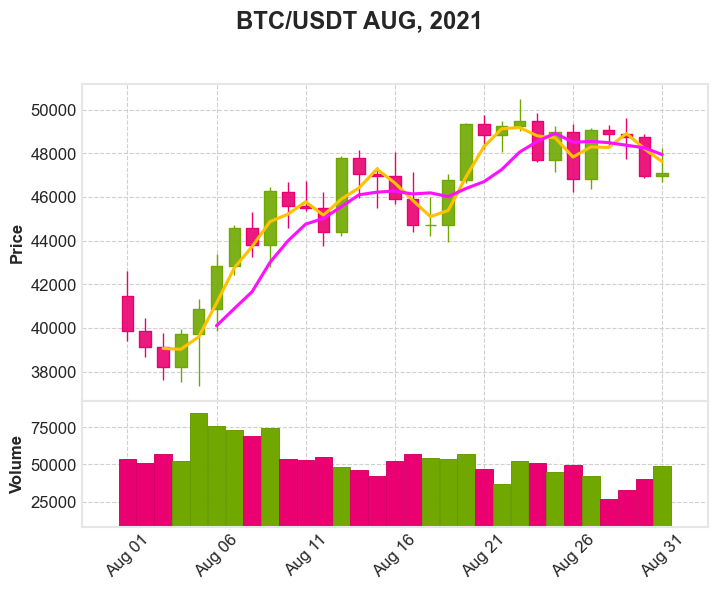

In [27]:
kwargs = dict(type='candle',title="BTC/USDT AUG, 2021",volume=True,mav=(3,6),figratio=(11,8),figscale=1.1)
mpf.plot(df.set_index('Close Time'),**kwargs,style='binance')

> Finally, we will save this figure 

In [28]:
mpf.plot(df.set_index('Close Time'),**kwargs,savefig='btc_usdt.png',style='binance')

#--- Uncomment the code below if you want to check the saved image
#import IPython.display as IPydisplay
#IPydisplay.Image(filename='btc_usdt.png')